# Project: Neural Networks - Bank Churn Prediction

# **Background and Context:**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

# **Objective:**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# **Data Description:**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

# **Data Dictionary:**

- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?



## Index

- <a href = #link1>1. Reading Dataset and Feature Elimination. (5 marks) </a>


- <a href = #link2>2. Perform an Exploratory Data Analysis on the data. (5 marks) </a> 


- <a href = #link3>3. Illustrate the insights based on EDA (5 marks) </a>


- <a href = #link4>4. Data Pre-processing (10 marks) </a> 


- <a href = #link5>5. Model building. (10 marks) </a>


- <a href = #link6>6. Model Performance Improvement. (15 marks) </a>


- <a href = #link7>7. Model Performance Evaluation (5 marks) </a>


- <a href = #link8>8. Conclusion and key takeaways (2.5 marks) </a>


- <a href = #link9>9. Notebook overall (2.5 marks) </a>



## <a id = "link1"></a> 1. Reading Dataset and Feature Elimination - Read the dataset properly - Print the overview of the data (statistical summary, shape, info, etc) - Eliminate the unique features from the dataset with proper reasoning (5 marks)

**Importing required libraries.**

In [1]:
from keras import backend as K
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from warnings import simplefilter
import keras
import matplotlib.pyplot as plt
import numpy as np   
import pandas as pd
import seaborn as sns
import tensorflow as tf
simplefilter(action='ignore', category=FutureWarning)
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("bank.csv")

### Understand the shape of the dataset.

In [3]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
data.shape

(10000, 14)

The dataset has 10000 rows and 14 columns

In [5]:
data.drop(columns=['RowNumber'], inplace=True)
data.drop(columns=['CustomerId'], inplace=True)
data.drop(columns=['Surname'], inplace=True)

### Check the data types of the columns for the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


- There are two float64, seven int64, and two object data types for this dataset.

### Check the percentage of missing values in each column

In [7]:
pd.DataFrame(data={'% of Missing Values':round(data.isnull().sum()/data.isnull().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values
CreditScore                      0.0
Geography                        0.0
Gender                           0.0
Age                              0.0
Tenure                           0.0
Balance                          0.0
NumOfProducts                    0.0
HasCrCard                        0.0
IsActiveMember                   0.0
EstimatedSalary                  0.0
Exited                           0.0

- There were zero missing values for this dataset.

### Summary of the dataset.

In [8]:
data.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

- Credit Score is slightly left skewed.
- Age is slightly right skewed.
- Tenure is equally distributed within the dataset.
- Balance is well distributed but customers with zero balance disrubt a clean curve.
- Estimated Salary is well distributed.

In [9]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

- A review of the unique values for the dataset has not indicated any areas of concern that require action at this time.

In [10]:
# Making a list of all categorical variables
cat_col = [
    "CreditScore",
    "Geography",
    "Gender",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "EstimatedSalary",
    "Exited",
    ]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64
----------------------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------------
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
----------------------------------------
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
----------------------------------------
0.00         3617
105473.74       2
130170.82       2
72594.00        1
139723.90       1
             ... 
130306.49       1
92895.56        1
132005.77       1
166287.85       1
104001.38       1
Na

- A detailed breakdown of the individual values in each dataset has not highlighted any areas needing to be resolved.

In [11]:
data['Geography'].replace('France', '0', inplace=True)
data['Geography'].replace('Germany', '1', inplace=True)
data['Geography'].replace('Spain', '2', inplace=True)

In [12]:
data['Gender'].replace('Male', '0', inplace=True)
data['Gender'].replace('Female', '1', inplace=True)

In [13]:
data['Geography'] = data['Geography'].astype('int64')
data['Gender'] = data['Gender'].astype('int64')

- A conversion is required of these fields to ensure computation can continue and datatypes are changed to int64 from object datatypes.

In [14]:
#checking the percentage of each class in the dataset
(data.Exited.value_counts())/(data.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

- This analysis indicates that roughly 20% of the customer base did exit this year and this information provides early insight to the Y variable.

## <a id = "link2"></a> 2.	Perform an Exploratory Data Analysis on the data - Checked whether the dataset is balanced or not - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive  (5 marks)

### Univariate analysis

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

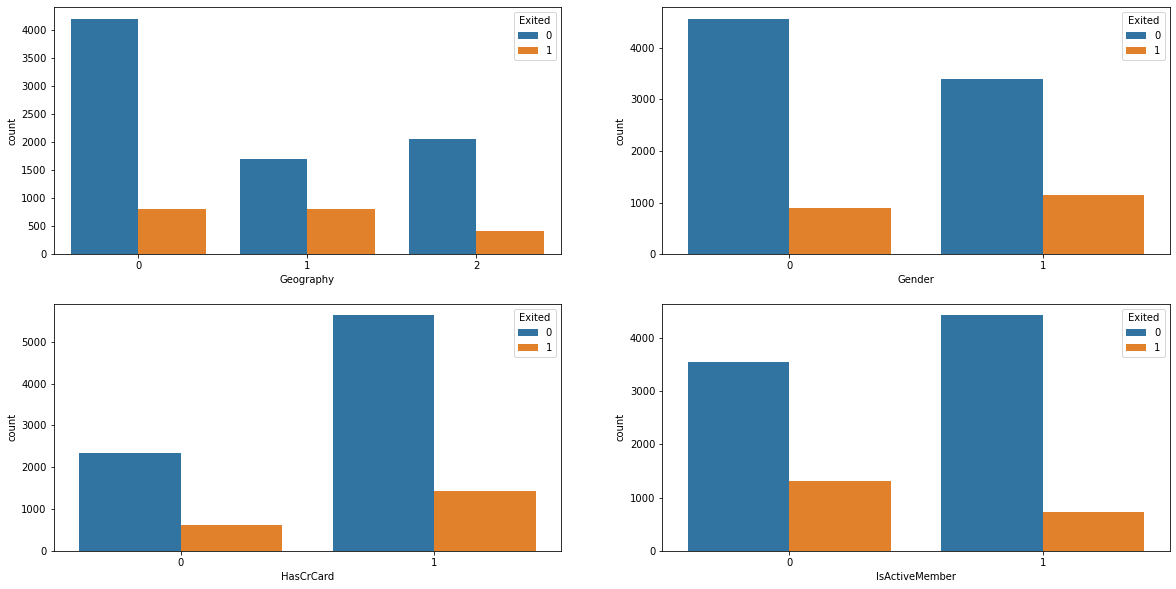

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x='Geography', hue = 'Exited', data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = data, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

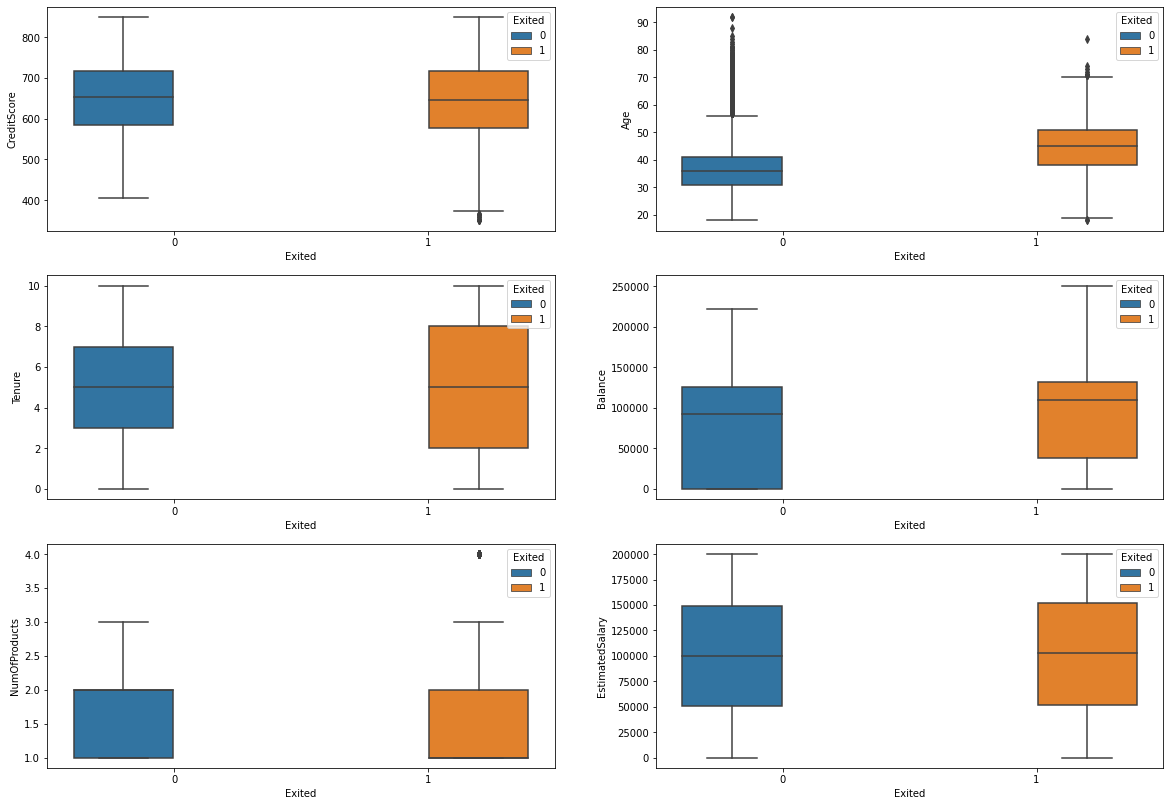

In [16]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 14))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited', data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited', data = data, ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited', data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited', data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited', data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited', data = data, ax=axarr[2][1])

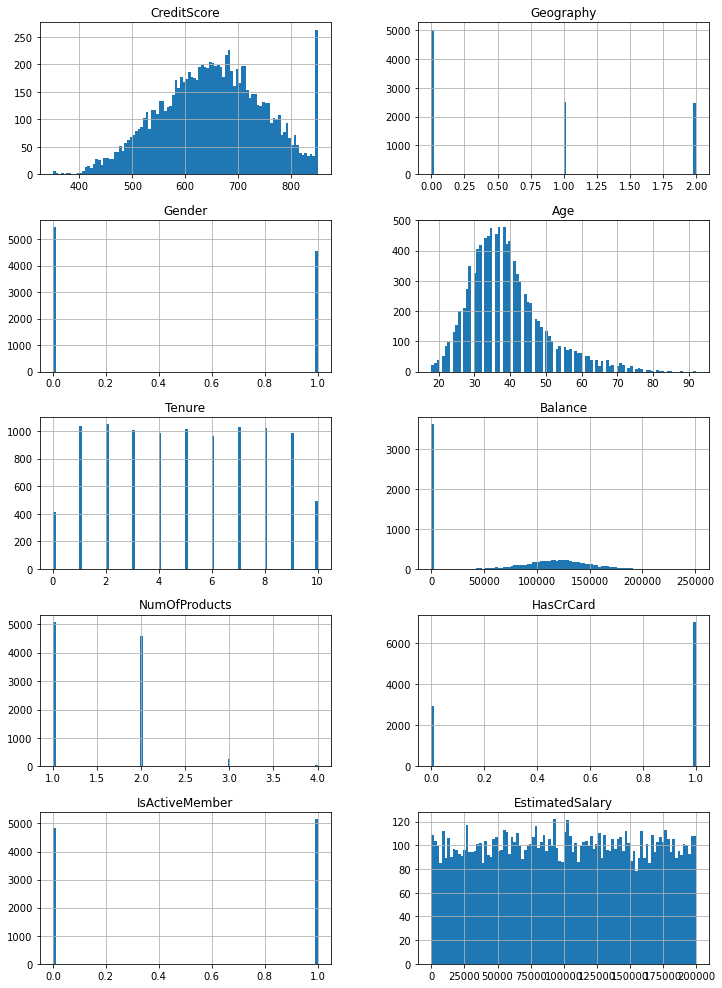

In [17]:
#Univariate
columns = list(data)[0:-1]
data[columns].hist(stacked=False, bins=100, figsize=(12,50), layout=(14,2)); 

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and hstogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [19]:
#histogram_boxplot(data['Age'])

- This histograms is heavily right skewed so the outliers will be clipped at 81.

In [20]:
data["Age"].clip(upper=70, inplace=True)

In [21]:
#histogram_boxplot(data['Tenure'])

- Customer Tenure is well distributed in both the boxplot and histogram.

In [22]:
#histogram_boxplot(data['Balance'])

- Customer balance is heavily skewed to right due to customers with zero balance.

In [23]:
#histogram_boxplot(data['NumOfProducts'])

- Number of Products is heavily skewed to right.  A majority of customers have one or two cards.

In [24]:
#histogram_boxplot(data['EstimatedSalary'])

- Estimated Salary is well distributed so no effort will be undertaken to adjust.

In [25]:
#histogram_boxplot(data['CreditScore'])

- Credit Score is slightly left skewed.  The lower outliers appear to be legitimate and not in error so they will be left as is.

In [26]:
#histogram_boxplot(data['Geography'])

- Geography is heavily skewed to right indicating a majority of customers are from France.  No effort will be undertaken to adjust data.

In [27]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

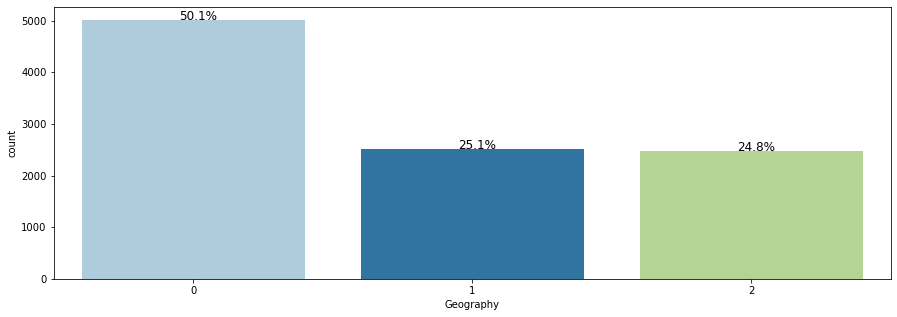

In [28]:
perc_on_bar('Geography')
#plt.legend(("France" , "Germany", "Spain") , loc =0)

- The bar chart indicates that half the customers are French and the other two countries eqaully share the 25% each. (Legend - France: 0, Germany: 1, & Spain: 2)

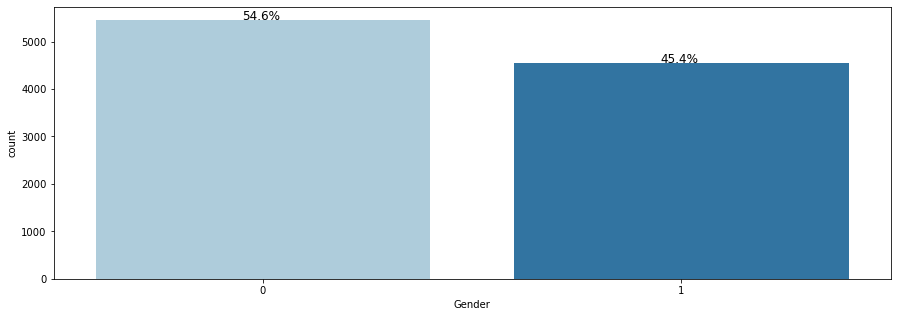

In [29]:
perc_on_bar('Gender')

- Roughtly 55% are Male and 45% Female. (Legend - Male: 0 & Female: 1)

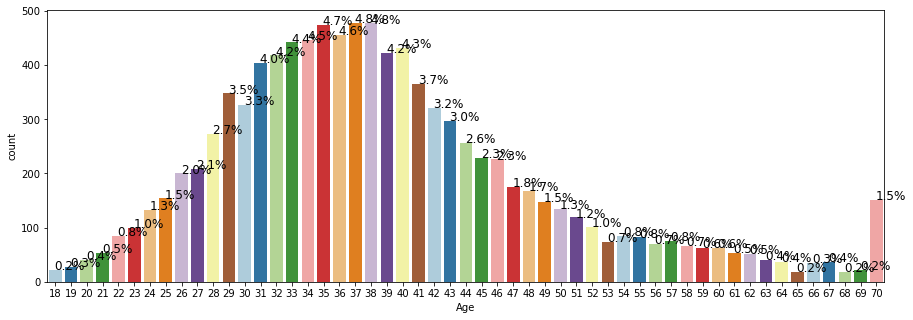

In [30]:
perc_on_bar('Age')

- The early thirtys to the mid fourtys show the largest amount of credit card customers.

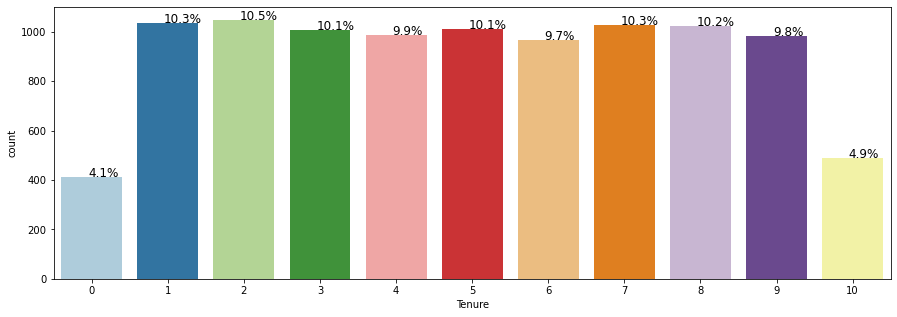

In [31]:
perc_on_bar('Tenure')

- Two years is the amount of time with the highest percentage followed by one year and seven years.

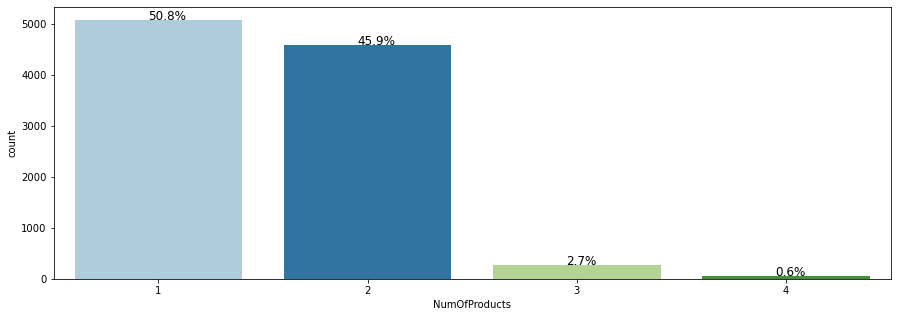

In [32]:
perc_on_bar('NumOfProducts')

- Over 50% of customers have only one card and 46% have two cards.

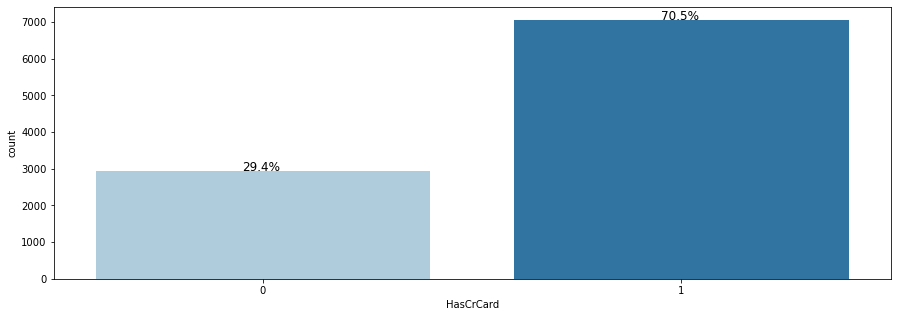

In [33]:
perc_on_bar('HasCrCard')

- 71% of customers have one card and 30% do not have a card. (Legend - No: 0 & Yes: 1)

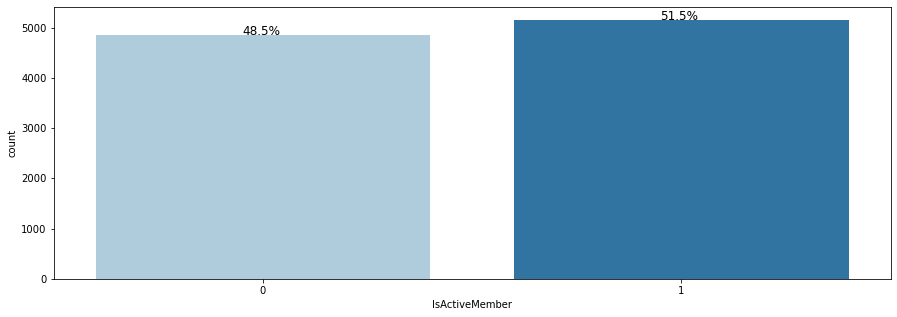

In [34]:
perc_on_bar('IsActiveMember')

- 51.5% are active members and 48.5% are inactive members. (Legend - No: 0 & Yes: 1)

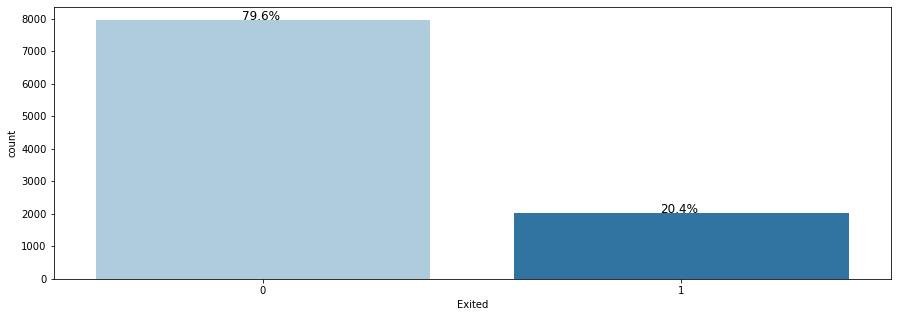

In [35]:
perc_on_bar('Exited')

- 79.6% of customers stayed while 20.4% exited. (Legend - No: 0 & Yes: 1)

### Bivariate analysis

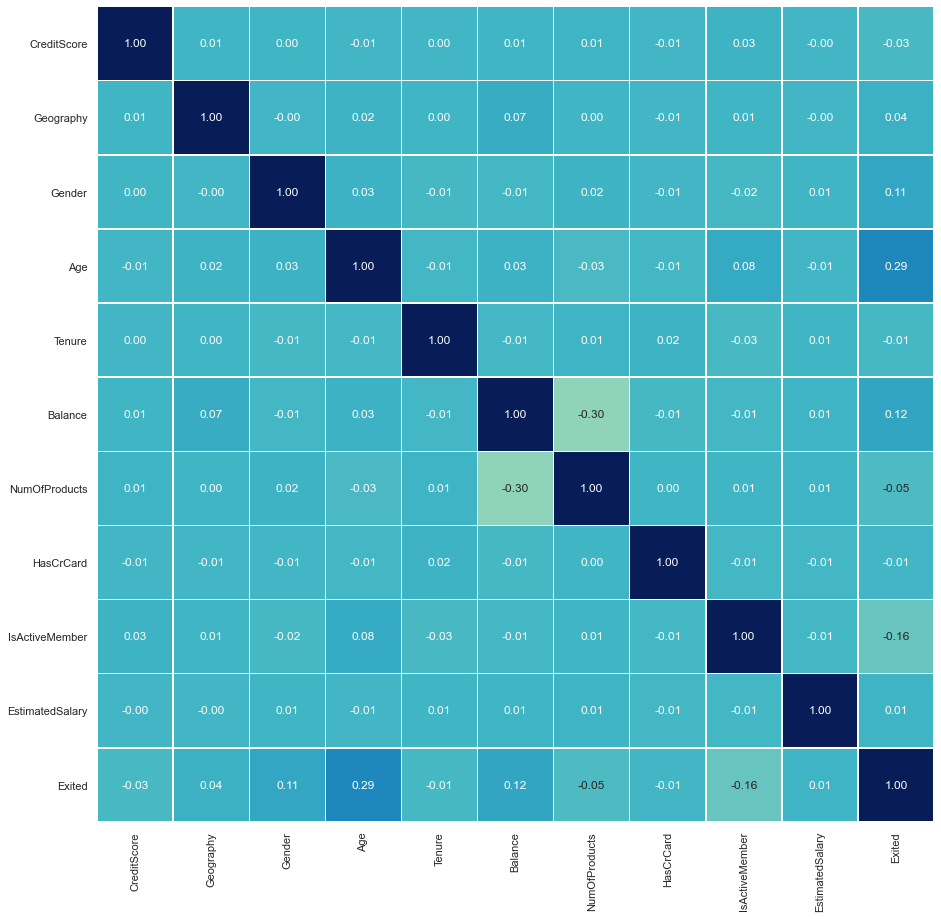

In [36]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

**Observation**
- There is a 29% correlation between age and customers that have exited.
- There is a 12% correlation between balance and customers that have exited.

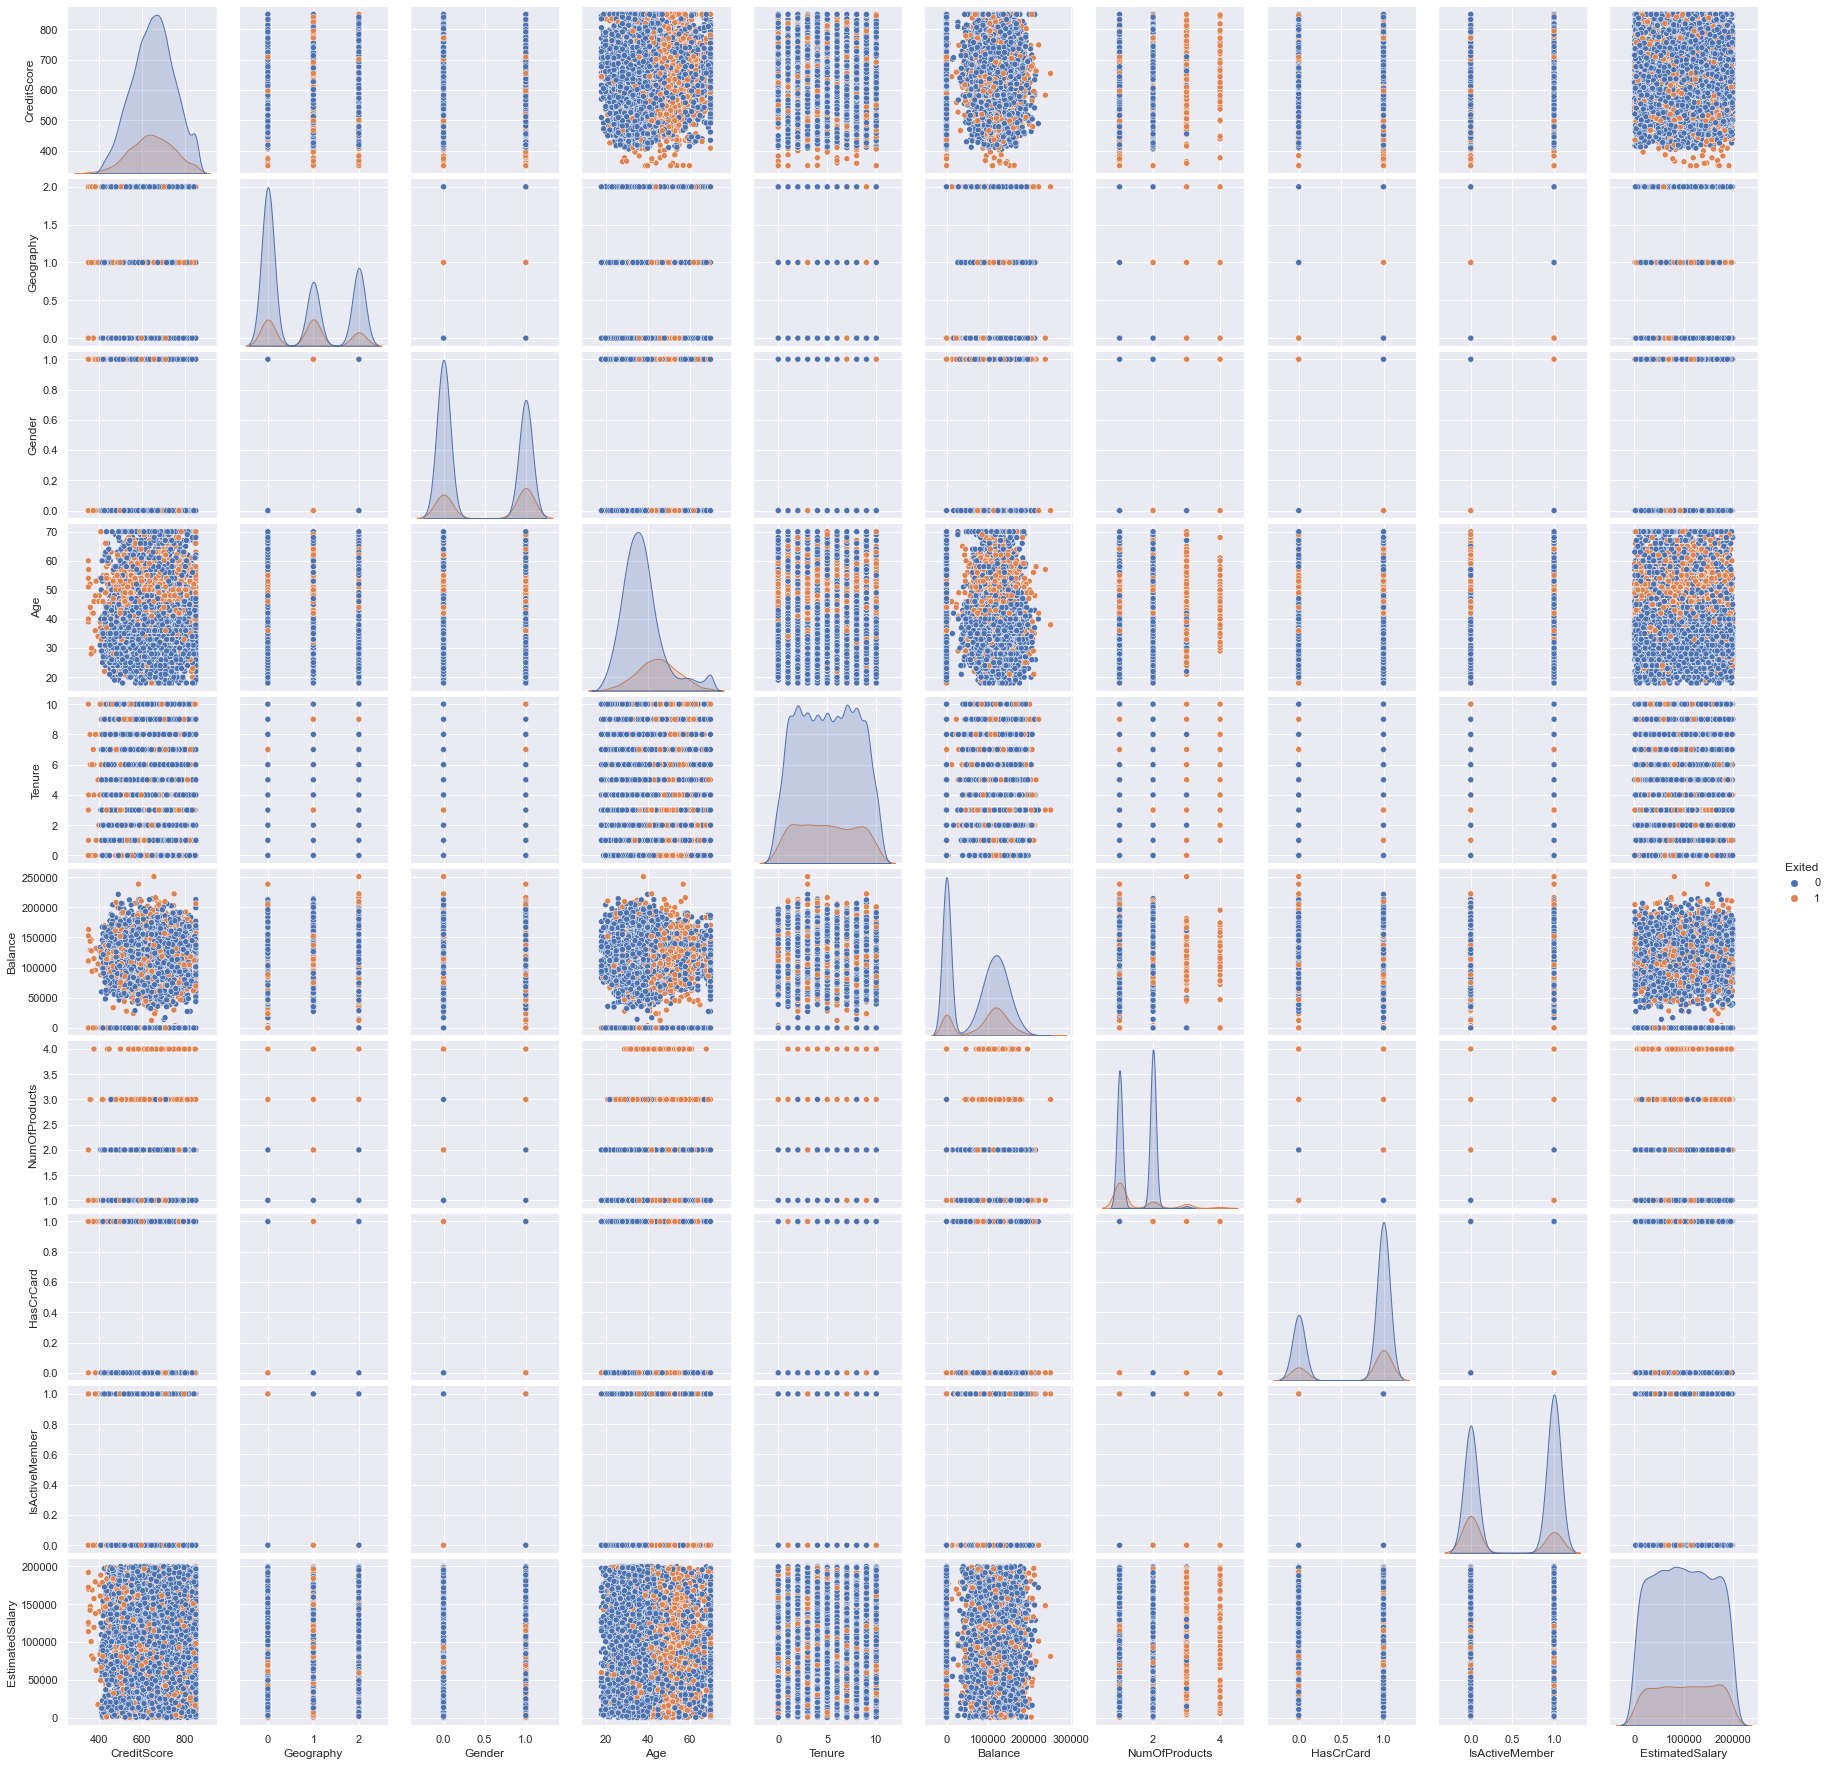

In [37]:
sns.pairplot(data, hue="Exited")

**Observation**
- All of the fields appear to be bimodal in nature and do not have a clear bell curve.
- Most of the fields have at least two viewable modes and some appear to have over three.

## <a id = "link3"></a> 3. Illustrate the insights based on EDA - Key meaningful observations from Bivariate analysis  (5 marks)

In [38]:
data['Exited'] = data['Exited'].astype('str')

In [39]:
# Changing categorical values to integers for analysis
data['Exited'].replace('1','Left',inplace=True)
data['Exited'].replace('0','Stayed',inplace=True)

In [40]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Exited'],margins=True).sort_values(by='Left',ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Exited'],normalize='index').sort_values(by='Left',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Exited vs Geography

Exited     Left  Stayed    All
Geography                     
All        2037    7963  10000
1           814    1695   2509
0           810    4204   5014
2           413    2064   2477
------------------------------------------------------------------------------------------------------------------------


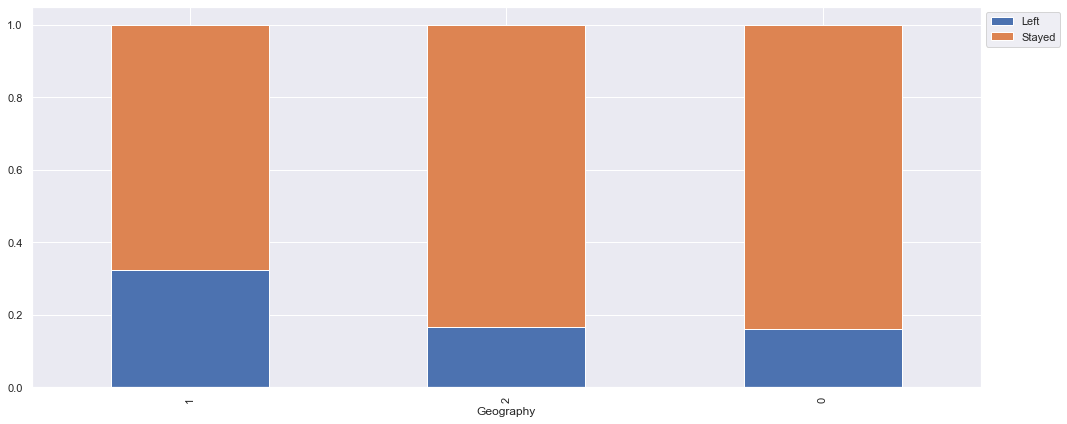

In [41]:
stacked_plot(data['Geography'])

- Data indicates customers from France are leaving at twice the rate of Germany and Spain.  (Legend - France:1, Germany: 2, & Spain: 3)

### Exited vs Gender

Exited  Left  Stayed    All
Gender                     
All     2037    7963  10000
1       1139    3404   4543
0        898    4559   5457
------------------------------------------------------------------------------------------------------------------------


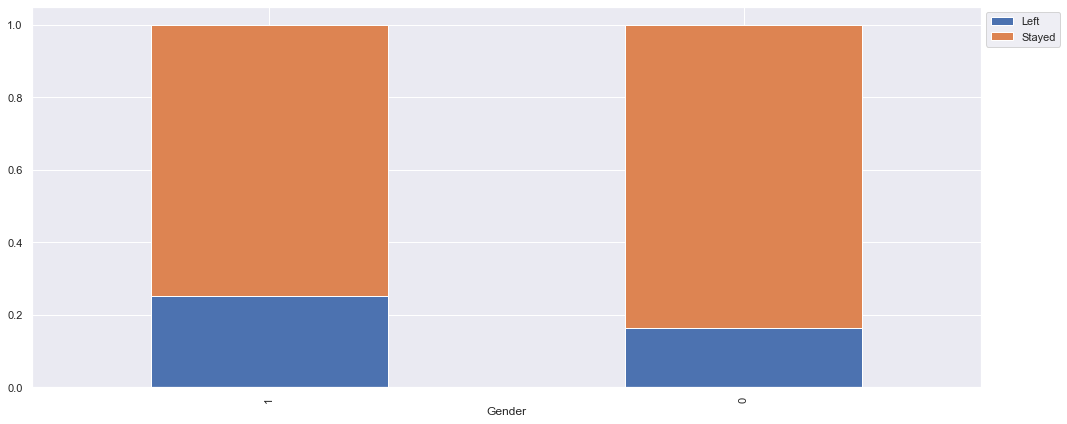

In [42]:
stacked_plot(data['Gender'])

- Chart indicates that Females continue to leave at a higher rate then men.  (Legend - Male: 0 & Female: 1)

### Exited vs Age

Exited  Left  Stayed    All
Age                        
All     2037    7963  10000
46        91     135    226
40        89     343    432
43        88     209    297
45        87     142    229
48        80      88    168
47        77      98    175
42        77     244    321
49        75      72    147
44        73     184    257
39        72     351    423
50        71      63    134
41        69     297    366
51        66      53    119
52        64      38    102
38        63     414    477
37        62     416    478
35        57     417    474
36        53     403    456
54        51      33     84
56        50      20     70
55        48      34     82
33        44     398    442
53        40      34     74
57        38      37     75
34        33     414    447
31        33     371    404
32        32     386    418
60        32      30     62
59        30      32     62
58        29      38     67
29        28     320    348
30        24     303    327
28        23     250

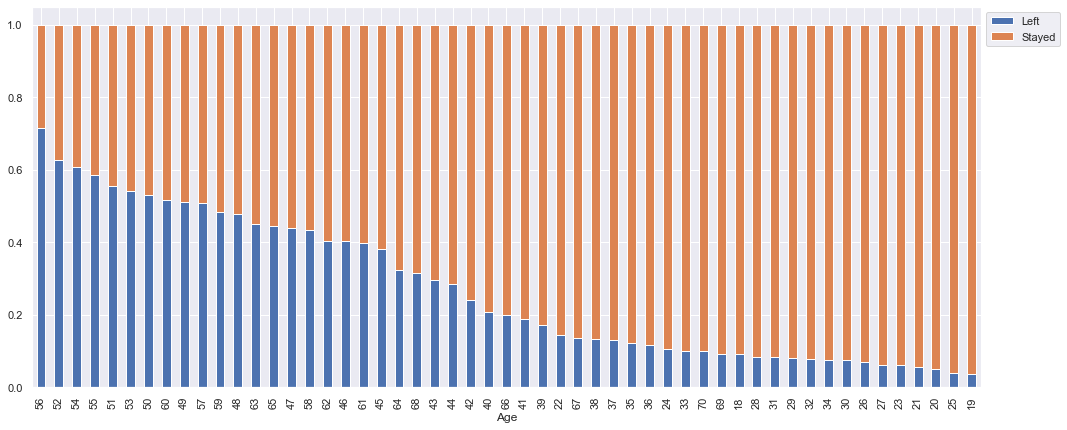

In [43]:
stacked_plot(data['Age'])

- Data indicates that customer between 40 to 60 leave at a higher rate than ages below or above that range.

### Exited vs Tenure

Exited  Left  Stayed    All
Tenure                     
All     2037    7963  10000
1        232     803   1035
3        213     796   1009
9        213     771    984
5        209     803   1012
4        203     786    989
2        201     847   1048
8        197     828   1025
6        196     771    967
7        177     851   1028
10       101     389    490
0         95     318    413
------------------------------------------------------------------------------------------------------------------------


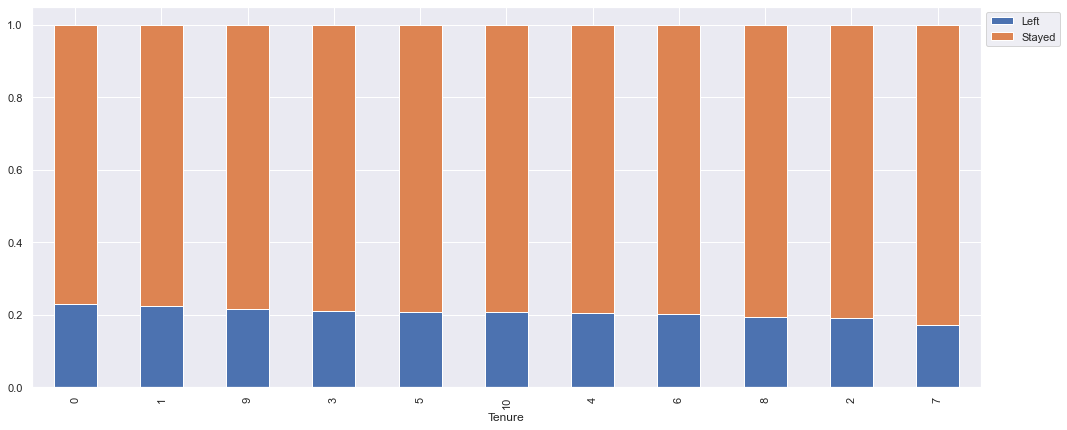

In [44]:
stacked_plot(data['Tenure'])

- Data indicates that customers with the highest attrition rate depart sometime in there first year of acquiring the credit card.

### Exited vs Number of Products

Exited         Left  Stayed    All
NumOfProducts                     
All            2037    7963  10000
1              1409    3675   5084
2               348    4242   4590
3               220      46    266
4                60       0     60
------------------------------------------------------------------------------------------------------------------------


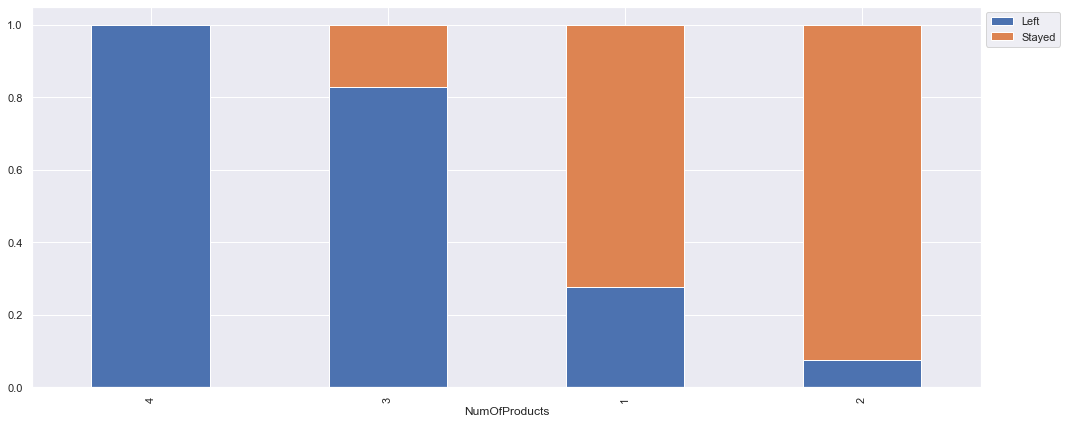

In [45]:
stacked_plot(data['NumOfProducts'])

- The data indicates that customers with four cards and three cards are near guaranteed to leave compared to customers with one or two cards.

### Exited vs Has Credit Card

Exited     Left  Stayed    All
HasCrCard                     
All        2037    7963  10000
1          1424    5631   7055
0           613    2332   2945
------------------------------------------------------------------------------------------------------------------------


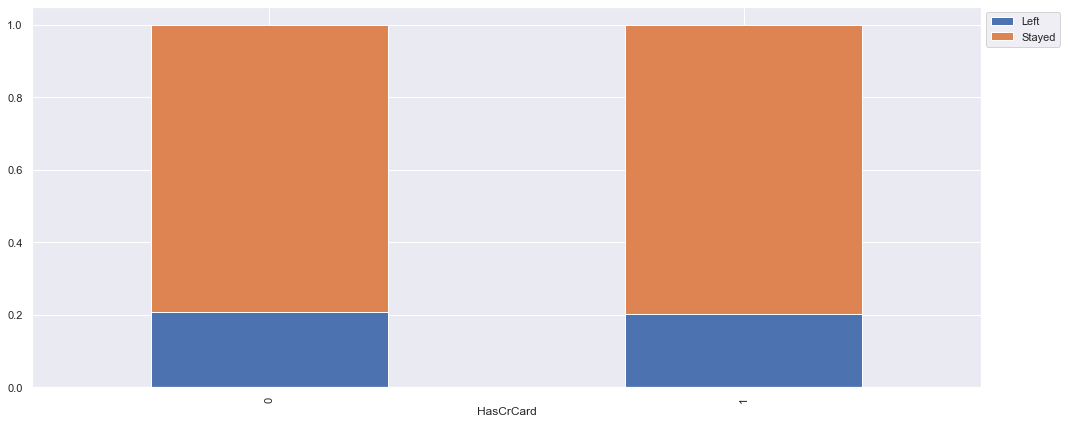

In [46]:
stacked_plot(data['HasCrCard'])

- Data indicates that customers with a card and without a card show vary little difference. (Legend - No: 0 & Yes: 1)

### Exited vs Is Active Member

Exited          Left  Stayed    All
IsActiveMember                     
All             2037    7963  10000
0               1302    3547   4849
1                735    4416   5151
------------------------------------------------------------------------------------------------------------------------


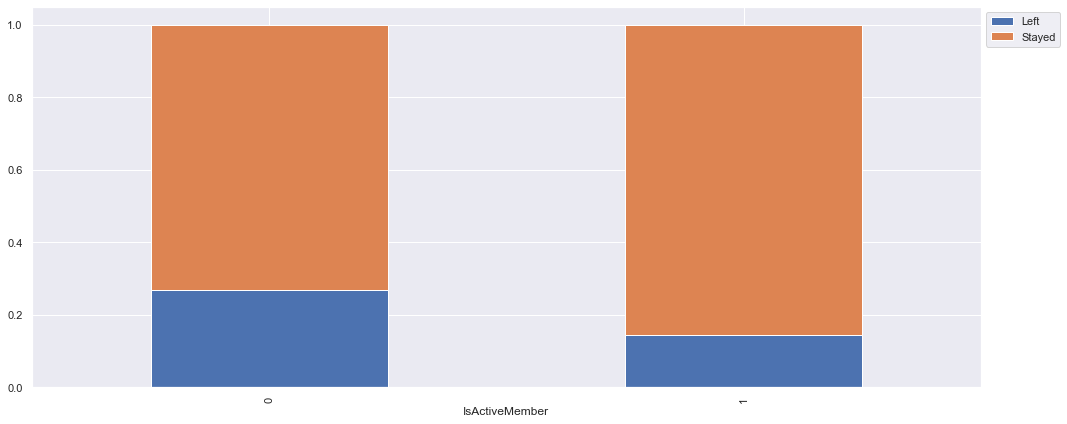

In [47]:
stacked_plot(data['IsActiveMember'])

- Data indicates that inactive members have a higher percentage of departure than customers who are active. (Legend - No: 0 & Yes: 1)

## <a id = "link4"></a>4. Data Pre-processing - Split the target variable and predictors - Split the data into train and test - Rescale the data  (10 marks)

In [48]:
# Changing categorical values to integers for analysis
data['Exited'].replace('Left','1',inplace=True)
data['Exited'].replace('Stayed','0',inplace=True)

In [49]:
data['Exited'] = data['Exited'].astype('int64')

In [50]:
Vfeatures = data.iloc[:,0:10].columns
print(Vfeatures)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [51]:
data

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       1   42       2       0.00              1   
1             608          2       1   41       1   83807.86              1   
2             502          0       1   42       8  159660.80              3   
3             699          0       1   39       1       0.00              2   
4             850          2       1   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       0   39       5       0.00              2   
9996          516          0       0   35      10   57369.61              1   
9997          709          0       1   36       7       0.00              1   
9998          772          1       0   42       3   75075.31              2   
9999          792          0       1   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

- Checking correlation between features and the likelihood of customer exited on the unbalanced dataset

Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

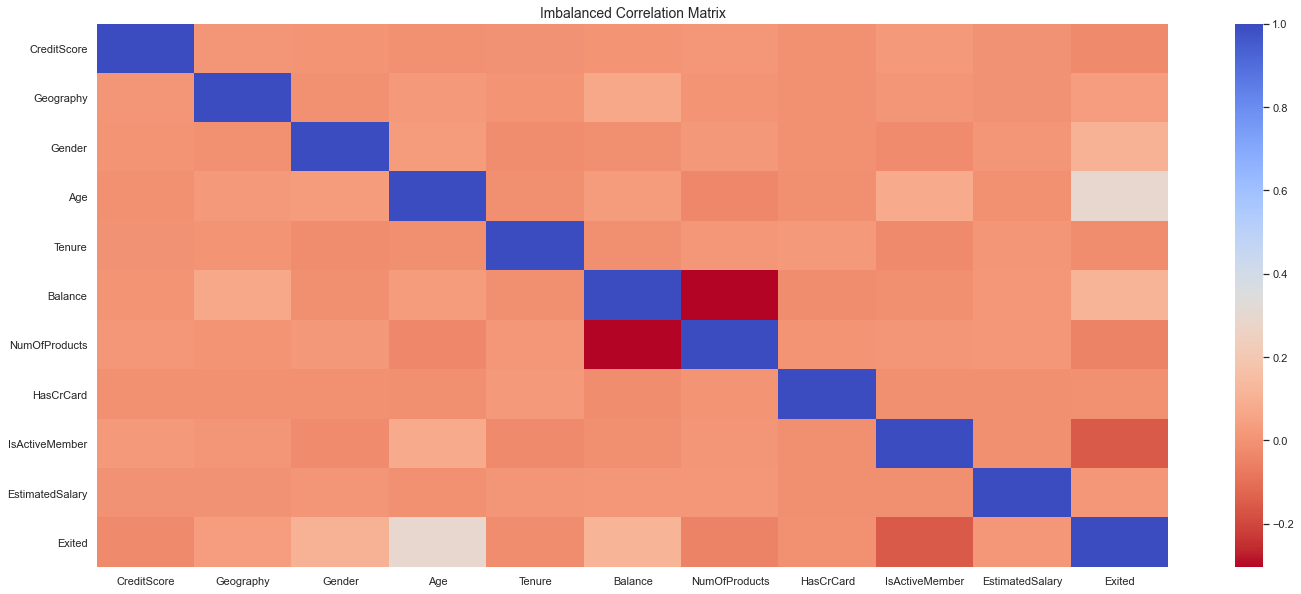

In [52]:
f, ax1 = plt.subplots(figsize=(24,10))

corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

- There appears to be a high negative correlation between Balance and Number of Products.  Likewise, there appears to be a negative correlation between whether the member is inactive and have they exited the card service.

In [53]:
X_data = data.iloc[:,0:10]
y_data = data.iloc[:, -1]

In [54]:
#printing the shape of the data 
print(y_data.shape)
print(X_data.shape)


(10000,)
(10000, 10)


### Data Pre-processing

In [55]:
X_data.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       1   42       2       0.00              1   
1          608          2       1   41       1   83807.86              1   
2          502          0       1   42       8  159660.80              3   
3          699          0       1   39       1       0.00              2   
4          850          2       1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [56]:
from sklearn.preprocessing import StandardScaler
X_data['normalizedCreditScore'] = StandardScaler().fit_transform(X_data['CreditScore'].values.reshape(-1,1))
X_data= X_data.drop(['CreditScore'],axis=1)

X_data['normalizedGeography'] = StandardScaler().fit_transform(X_data['Geography'].values.reshape(-1,1))
X_data= X_data.drop(['Geography'],axis=1)

X_data['normalizedGender'] = StandardScaler().fit_transform(X_data['Gender'].values.reshape(-1,1))
X_data= X_data.drop(['Gender'],axis=1)

X_data['normalizedTenure'] = StandardScaler().fit_transform(X_data['Tenure'].values.reshape(-1,1))
X_data= X_data.drop(['Tenure'],axis=1)

X_data['normalizedBalance'] = StandardScaler().fit_transform(X_data['Balance'].values.reshape(-1,1))
X_data= X_data.drop(['Balance'],axis=1)

X_data['normalizedNumOfProducts'] = StandardScaler().fit_transform(X_data['NumOfProducts'].values.reshape(-1,1))
X_data= X_data.drop(['NumOfProducts'],axis=1)

X_data['normalizedHasCrCard'] = StandardScaler().fit_transform(X_data['HasCrCard'].values.reshape(-1,1))
X_data= X_data.drop(['HasCrCard'],axis=1)

X_data['normalizedIsActiveMember'] = StandardScaler().fit_transform(X_data['IsActiveMember'].values.reshape(-1,1))
X_data= X_data.drop(['IsActiveMember'],axis=1)

X_data['normalizedEstimatedSalary'] = StandardScaler().fit_transform(X_data['EstimatedSalary'].values.reshape(-1,1))
X_data= X_data.drop(['EstimatedSalary'],axis=1)
X_data['normalizedAge'] = StandardScaler().fit_transform(X_data['Age'].values.reshape(-1,1))
X_data= X_data.drop(['Age'],axis=1)

### Splitting the Data into train and test set

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [58]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


## <a id = "link6"></a>5. Model building - Build Neural Network  (10 marks)

### Random Forest

In [59]:
random_forest = RandomForestClassifier(n_estimators=100)

In [60]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [61]:
y_pred = random_forest.predict(X_test)

In [62]:
random_forest.score(X_test,y_test)

0.863

- A score of 85.8% is not as high as desired at this point.

In [63]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

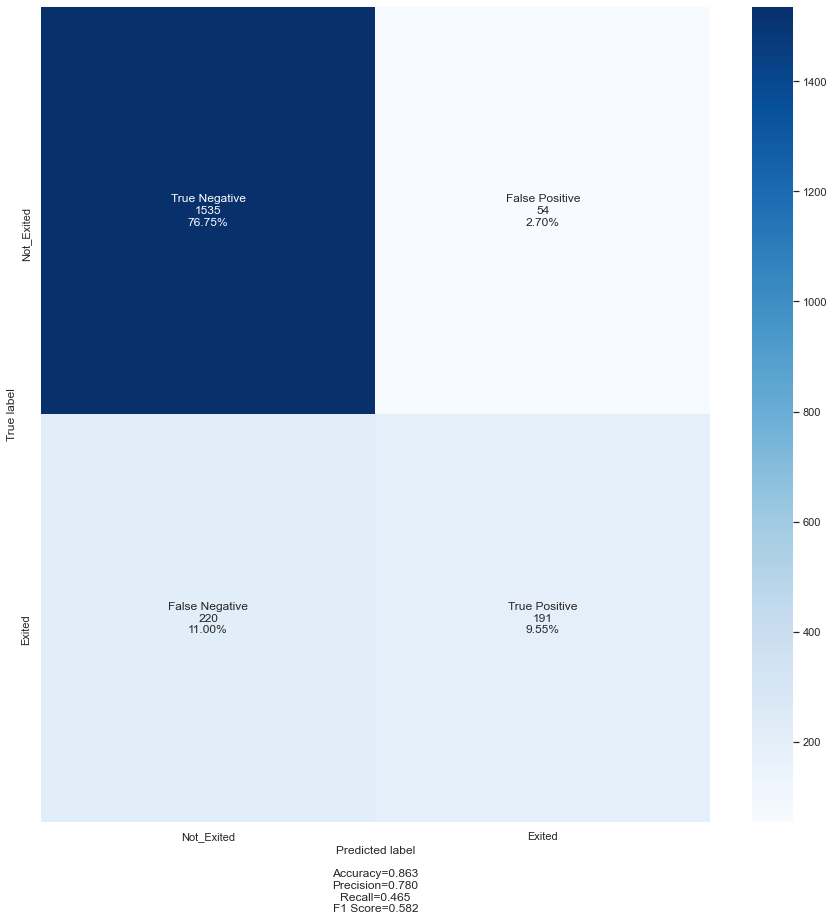

In [64]:



cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- The False Positive is 59 (2.95%) and False Negative is 226 (11.30%).  These are both higher than desired and will be addressed further in the model.

### Creating a model

In [65]:
#initialize the model
model = Sequential()

In [66]:

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 29,activation='relu'))   # input of 29 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

## <a id = "link5"></a>6. Model Performance Improvement - comment on which metric is right for model performance evaluation and why? - Find the optimal threshold using ROC-AUC or Precision-Recall curves - Comment on model performance - Can model performance be improved? check and comment - Build another model to implement these improvements - Include all the model which were trained to reach at the final one  (15 marks)

### Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated


In [67]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Training [Forward pass and Backpropagation]

Training the model

In [68]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 3s 3ms/step - loss: 0.5014 - accuracy: 0.7939 - val_loss: 0.4644 - val_accuracy: 0.7894
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.7980 - val_loss: 0.4485 - val_accuracy: 0.7931
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8056 - val_loss: 0.4402 - val_accuracy: 0.8019
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8122 - val_loss: 0.4308 - val_accuracy: 0.8069
Epoch 5/10
427/427 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8241 - val_loss: 0.4171 - val_accuracy: 0.8263
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8336 - val_loss: 0.4027 - val_accuracy: 0.8319
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8359 - val_loss: 0.3936 - val_accuracy: 0.8363
Epoch 

Plotting the train and test loss

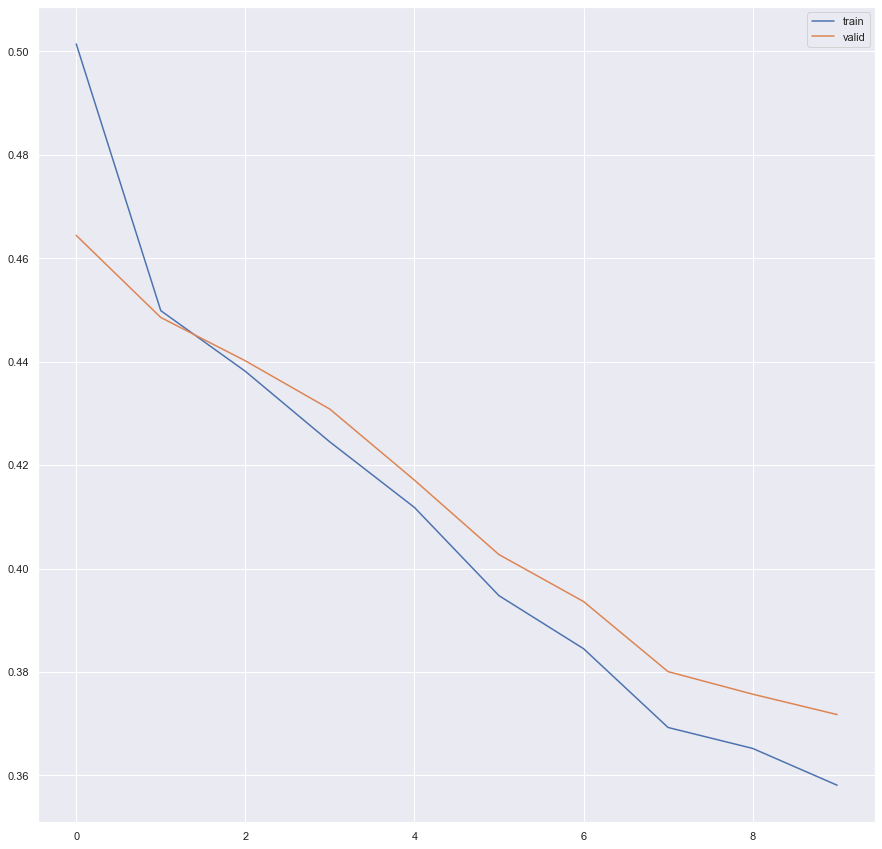

In [69]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [70]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8420


- The model's accuracy is less than desired at 85.7%.

In [71]:
print(score)


[0.3609771728515625, 0.8420000076293945]


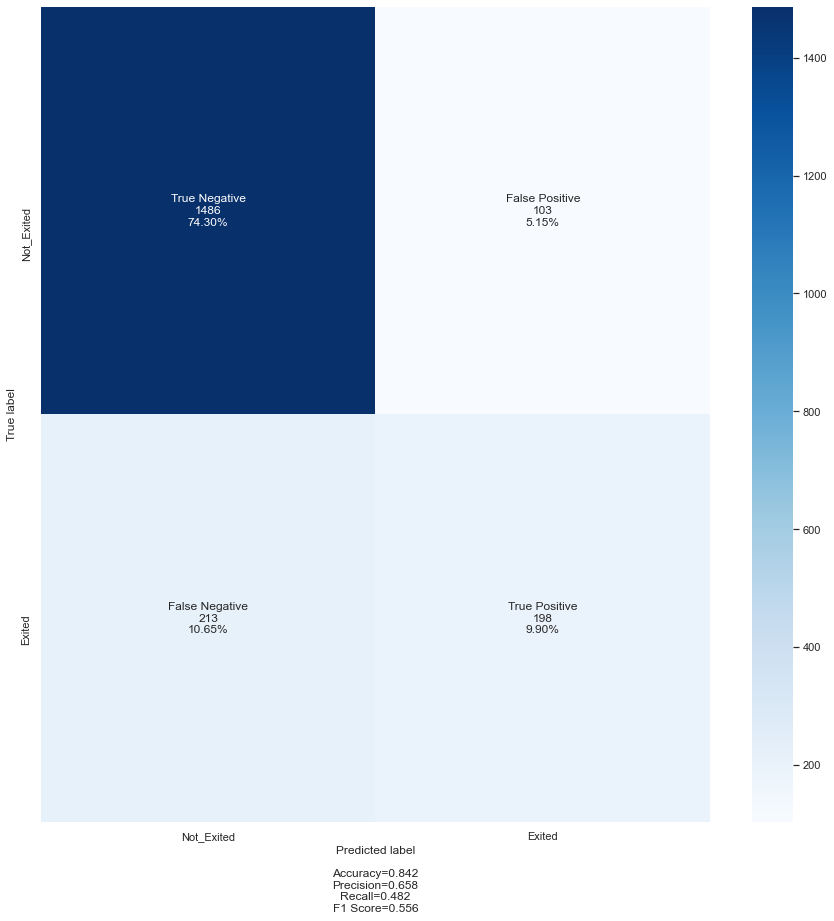

In [72]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Detection of customers exiting did not improve compared to the previous machine learning model ( Randomforest).

- The number of False Positives increased to 282 (14.1%) and the number of False Negative increased to 131 (6.55%).  The numbers under Random Forest were better overall.

**Conclusion:**

We must find ways to further reduce the number of False Negatives and False Positives.

In [73]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
#Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/40
10/10 [==============================] - 2s 65ms/step - loss: 0.9233 - accuracy: 0.6228 - val_loss: 0.6348 - val_accuracy: 0.7125
Epoch 2/40
10/10 [==============================] - 0s 7ms/step - loss: 0.8818 - accuracy: 0.6555 - val_loss: 0.5989 - val_accuracy: 0.7425
Epoch 3/40
10/10 [==============================] - 0s 7ms/step - loss: 0.8232 - accuracy: 0.6867 - val_loss: 0.5726 - val_accuracy: 0.7588
Epoch 4/40
10/10 [==============================] - 0s 7ms/step - loss: 0.7672 - accuracy: 0.7095 - val_loss: 0.5504 - val_accuracy: 0.7706
Epoch 5/40
10/10 [==============================] - 0s 7ms/step - loss: 0.7401 - accuracy: 0.7153 - val_loss: 0.5318 - val_accuracy: 0.7725
Epoch 6/40
10/10 [==============================] - 0s 7ms/step - loss: 0.7061 - accuracy: 0.7291 - val_loss: 0.5183 - val_accuracy: 0.7756
Epoch 7/40
10/10 [==============================] - 0s 7ms/step - loss: 0.7138 - accuracy: 0.7247 - val_loss: 0.5075 - val_accuracy: 0.7819
Epoch 8/40
10/10 [=

Plotting the train and validation loss

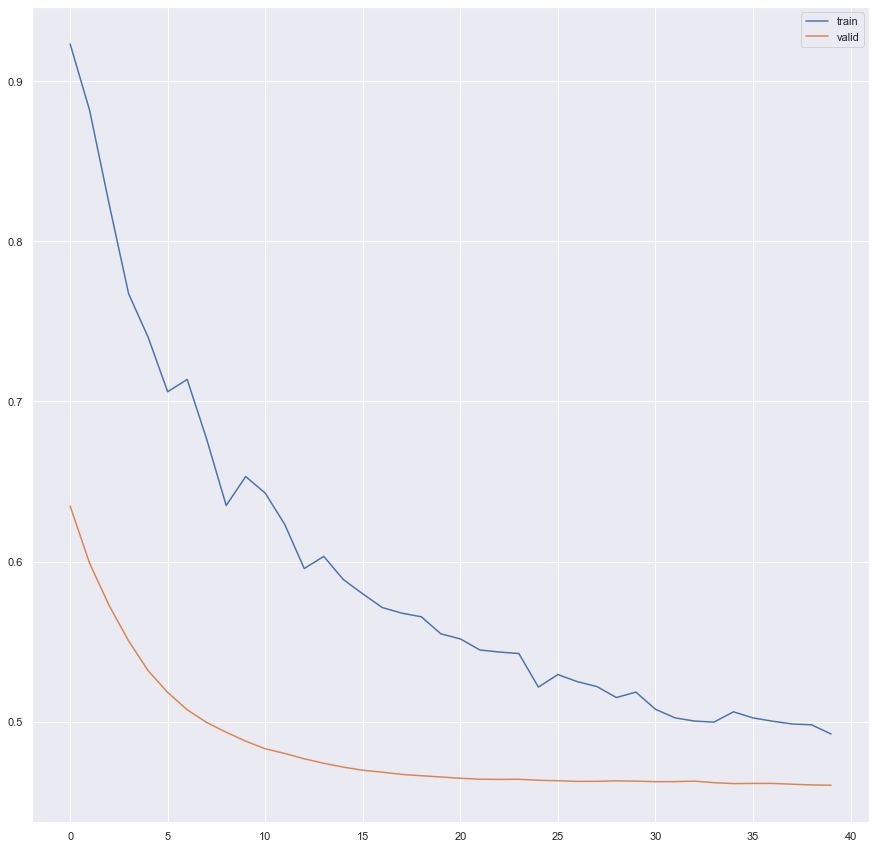

In [74]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


Plotting confusion matrix 

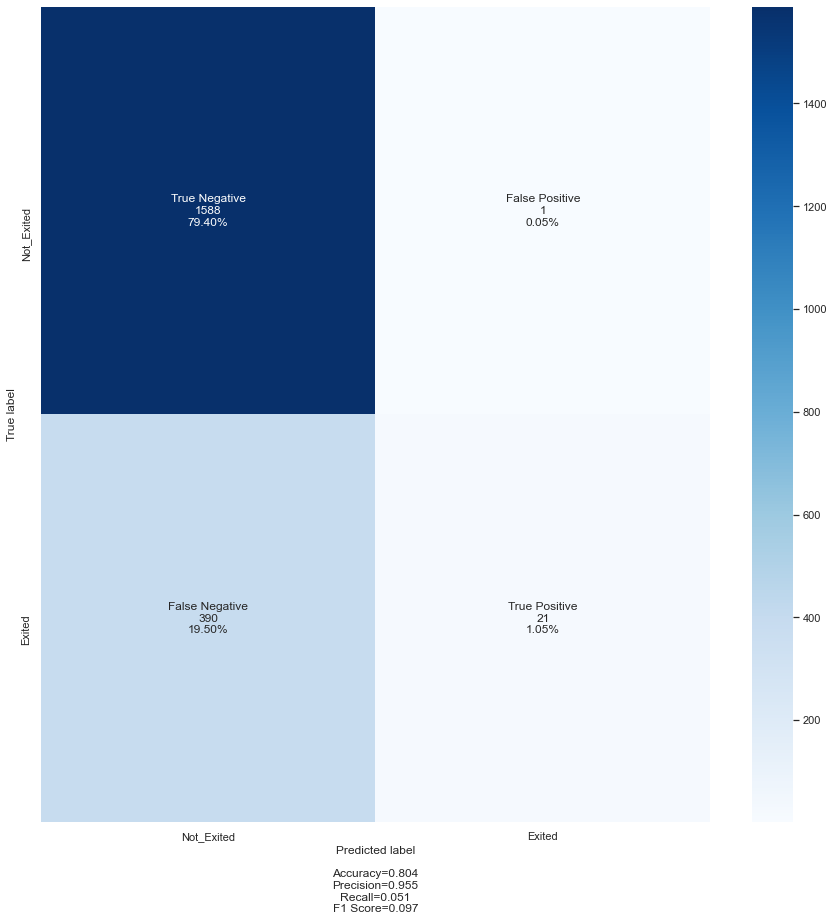

In [75]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- The Recall of the model has not improved and it is worse than the Previous ANN model as well as the RandomForest.
- The False Positive has decreased significantly but the False Negaitve has increased.

In [76]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

Training the model

In [77]:
model.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/5
534/534 [==============================] - 2s 3ms/step - loss: 0.5043 - accuracy: 0.7663
Epoch 2/5
534/534 [==============================] - 2s 3ms/step - loss: 0.4883 - accuracy: 0.7865
Epoch 3/5
534/534 [==============================] - 2s 3ms/step - loss: 0.4828 - accuracy: 0.7831
Epoch 4/5
534/534 [==============================] - 1s 3ms/step - loss: 0.4809 - accuracy: 0.7881
Epoch 5/5
534/534 [==============================] - 2s 3ms/step - loss: 0.4752 - accuracy: 0.7946


In [78]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7955


Plotting confusion matrix 

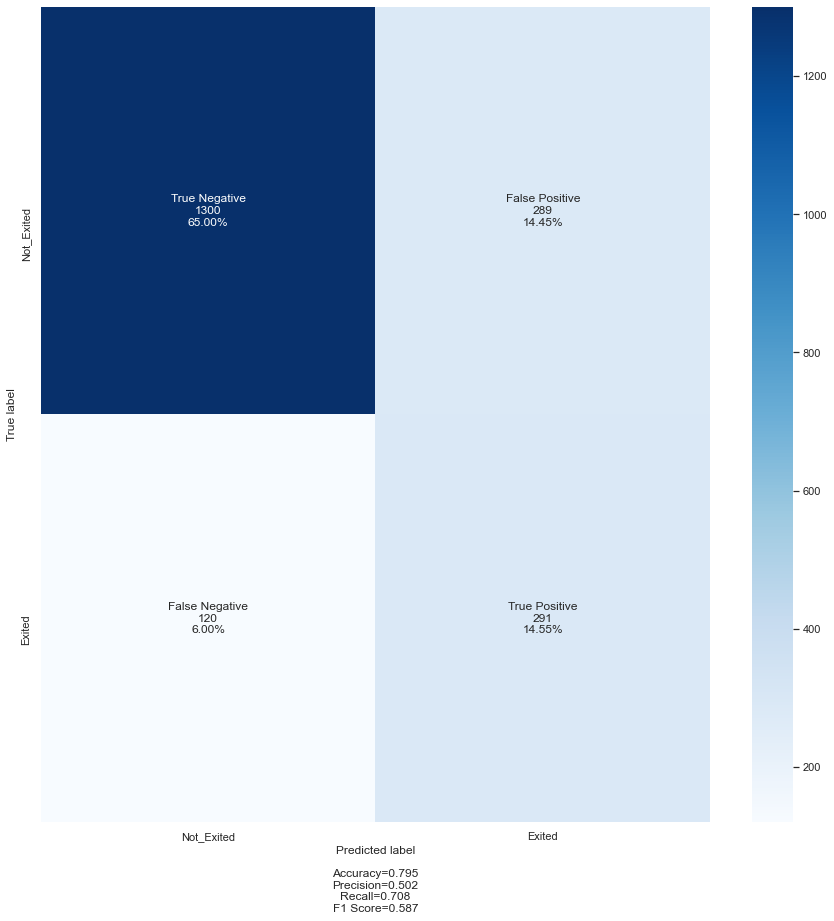

In [79]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- The recall score has inproved but precision has dropped again.
- The False Positive and False Negative scores have also increased to the higher scores found within the Random Forest calculation.

## <a id = "link7"></a>7. Model Performance Evaluation - evaluate the model on different performance metrics and comment on the performance and scope of improvement  (5 marks)

## <a id = "link8"></a> 8. Conclusion and key takeaways - final conclusion about the analysis (2.5 points)

### What are your recommendations to the bank on how to better market to and service these customers?

- There are several key areas the bank can focus effort to improve customers retention and several of the options are a slight shift in marketing strategies.
- Geography: focus greater effort on retaining customers from France and market to those customers.
- Gender: Females continue to exit as a faster rate then men.  Effort should be expended to market to their unique demographic.
- Age: the rention rate for 40-60 remains high and effort should be used to retain that age group.  This age group in general spends more when using card and demands greater customer service resources.
- Number of products: effort should continue to be spent on customers with one or two cards.  The data shows the customers with four or three cards are almost guaranteed to leave.
- Active members: the inactive members should be focused on more for retention through marketing efforts.  A key indicator of exiting the credit card service is inactivity.

- Note: I attempted to modify the Adam score and the number of Epoch with little success.  During the class videos the instructor was able to show good results but I did not have luck significantly improving my models.

## <a id = "link9"></a> 9. Notebook - Notebook overall - Structure and flow - Well commented code (2.5 points)